In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Bike-Sharing-Dataset/day.csv")

In [3]:
# data.info()
data.head()
# data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
data.drop(["dteday"], axis=1, inplace=True)
data.drop(["instant"], axis=1, inplace=True)

In [7]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Each row, ignoring the last column
X = data.iloc[:, :-1]
X = np.array(X)
np.save('day_X', X)

# Each row, using only the last column
y = data.iloc[:, -1]
y = np.array(y)
np.save('day_y', y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [10]:
# X_train.shape
# y_train.shape
# X_test.shape
# y_test.shape

In [11]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=75)
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=75)

In [12]:
y_test_hat = regr.predict(X_test)

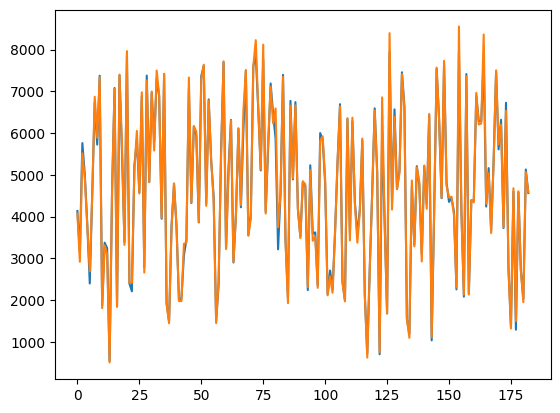

In [13]:
plt.plot(np.arange(0, len(y_test_hat)), y_test_hat)
plt.plot(np.arange(0, len(y_test_hat)), y_test)

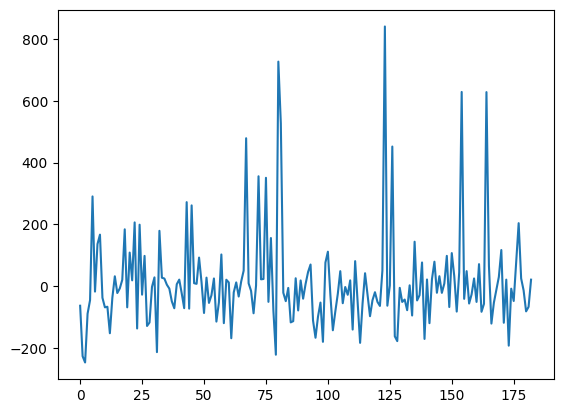

In [14]:
plt.plot(np.arange(0, len(y_test_hat)), y_test - y_test_hat)

In [15]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_test_hat))

157.5940220620002

In [16]:
# Saving the model
import pickle
file = open('bike_rentals_rf_np', 'wb')
pickle.dump(regr, file)
file.close()

In [17]:
# Loading the model
# file = open('bike_rentals_rf_np', 'rb')
# regr2 = pickle.load(file)
# file.close()
# y_test_hat_2 = regr2.predict(X_test)

In [18]:
# Check
# plt.plot(np.arange(0, len(y_test_hat)), y_test_hat - y_test_hat_2)